In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, roc_curve
from sklearn.metrics import confusion_matrix

In [2]:
data_name = "train1"
# read clustered file
CLUSTER_COL_NAMES = ("index", "rep", "dis_to_rep", "cluster")
prefix_cluster = "../../result/streaming/coreset/data/"
cluster_data_path = prefix_cluster + data_name + "/" + data_name + "_v1.csv"
cluster_data = pd.read_csv(cluster_data_path, header = None, names = CLUSTER_COL_NAMES, delimiter=" +", engine="python")
cluster_data = cluster_data.dropna()

In [3]:
# read original file
COLUMN_NAMES = ("Tweet","following","followers","actions","is_retweet","location","Type","No")
prefix = "../../datasets/spam_twitter/"
data = pd.read_csv(prefix + data_name + ".csv", header = 0, names = COLUMN_NAMES)
data = data.drop(["No"], axis = 1)

final_data = []
for i in range(len(cluster_data)):
  tmp = data["Type"].values[cluster_data["index"].values[i]]
  if tmp == "Quality":
    final_data.append(0)
  elif tmp == "Spam":
    final_data.append(1)

Confusion matrix by DTW

Performance in % on a test basis:
Accuracy: 0.5036764705882353
Precision: 0.25183823529411764
Recall: 0.5
F1: 0.33496332518337407
AUC: nan


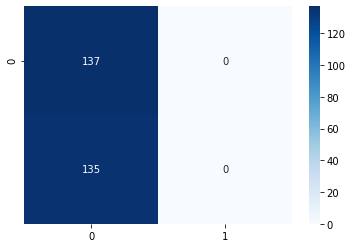

In [6]:
final_data1 = np.asarray(final_data)
cluster_data1 = np.asarray(cluster_data["cluster"])

# Evaluation of results by confusion matrices
print('Confusion matrix by DTW')
cm = confusion_matrix(final_data1, cluster_data1)
sns.heatmap(data = cm, fmt = '.0f', xticklabels = np.unique(final_data1), yticklabels = np.unique(cluster_data["cluster"]), annot=True, cmap = "Blues")

# performance score
print('\nPerformance in % on a test basis:')
print('Accuracy:', accuracy_score(final_data1, cluster_data1))
print('Precision:', precision_score(final_data1, cluster_data1, average="macro"))
print('Recall:', recall_score(final_data1, cluster_data1, average="macro"))
print('F1:', f1_score(final_data1, cluster_data1, average="macro"))
fpr, tpr, thresholds = roc_curve(final_data1, cluster_data1, pos_label=2)
print('AUC:', auc(fpr, tpr))